In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import glob
import tqdm


In [2]:
import PIL
import numpy as np
from PIL import Image
from numpy import asarray
# Open the image form working directory
from tqdm import tqdm



In [3]:
def getData(num_samples=500,PATHS=['../../datasets/cells/all/*bmp','../../datasets/cells/hem/*bmp']):
    count=0
    FILES={}
    LEN=np.zeros(2,)
    for i in PATHS:
        FILES[count]=glob.glob(i)
        LEN[count]=len(FILES[count])
        count=count+1
    print('Number in each class: ',LEN)

    INDEX_ARRAY={}
    for i in np.arange(len(PATHS)):
        INDEX_ARRAY[i]=np.random.permutation(int(LEN[i]))

    print(INDEX_ARRAY[0])

    NUM_TRAINING=10
    TOTAL_NUMBER_OF_EXAMPLES=np.floor(np.array(LEN).astype(int)*.1).astype(int)
    TOTAL_NUMBER_OF_VALIDATION_EXAMPLES=np.array(num_samples-TOTAL_NUMBER_OF_EXAMPLES).astype(int)
    print(TOTAL_NUMBER_OF_EXAMPLES,TOTAL_NUMBER_OF_VALIDATION_EXAMPLES)

    ar_tr = np.zeros([TOTAL_NUMBER_OF_EXAMPLES.sum(),450,450, 3], dtype=np.uint8)
    label_tr=np.empty((TOTAL_NUMBER_OF_EXAMPLES.sum(),), dtype='uint8')
    ar_ts = np.zeros([TOTAL_NUMBER_OF_VALIDATION_EXAMPLES.sum(),450,450, 3], dtype=np.uint8)
    label_ts=np.empty((TOTAL_NUMBER_OF_VALIDATION_EXAMPLES.sum(),), dtype='uint8')

    num=0
    for i in np.arange(len(PATHS)):
        for f in tqdm(np.array(FILES[i])[INDEX_ARRAY[i][:TOTAL_NUMBER_OF_EXAMPLES[i]]]):
            image = Image.open(f)
            data = asarray(image)
            ar_tr[num,:,:,:]=data
            label_tr[num]=i
            num=num+1
    plt.figure()
    plt.imshow(ar_tr[2,:,:,0])
    plt.figure()
    plt.imshow(ar_tr[TOTAL_NUMBER_OF_EXAMPLES[0]+2,:,:,0]);    
    
    
    num=0
    for i in np.arange(len(PATHS)):
        for f in tqdm(np.array(FILES[i])[INDEX_ARRAY[i][TOTAL_NUMBER_OF_EXAMPLES[i]:num_samples]]):
            image = Image.open(f)
            data = asarray(image)
            ar_ts[num,:,:,:]=data
            label_ts[num]=i
            num=num+1
    plt.figure()
    plt.imshow(ar_ts[2,:,:,0])
    plt.figure()
    plt.imshow(ar_ts[TOTAL_NUMBER_OF_VALIDATION_EXAMPLES[0]+2,:,:,0]);    
    
    
    
    x_train=ar_tr
    x_test=ar_ts
    y_train=label_tr
    y_test=label_ts
    return (x_train, y_train), (x_test, y_test)

  1%|▏         | 3/239 [00:00<00:11, 21.10it/s]

Number in each class:  [2397. 1130.]
[2124 1385  820 ... 1036 2359  896]
[239 113] [261 387]


100%|██████████| 387/387 [00:11<00:00, 34.14it/s]


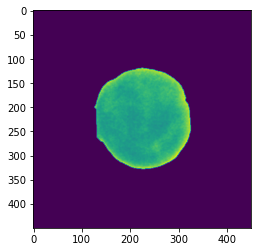

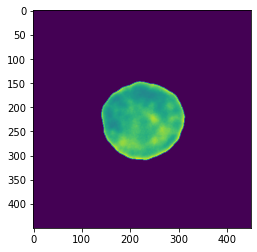

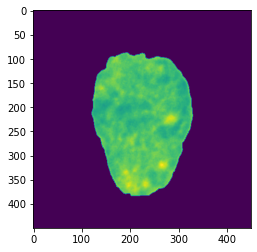

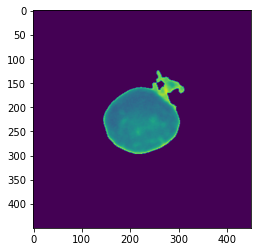

In [4]:
(train_images, train_labels), (test_images, test_labels)=getData(500)

In [5]:
print(train_images.shape,len(train_labels))
print(test_images.shape,len(test_labels))

(352, 450, 450, 3) 352
(648, 450, 450, 3) 648


In [6]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [7]:
class_names = ['abnormal','normal']



In [8]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(450, 450, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2,activation=tf.nn.softmax))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 448, 448, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 224, 224, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
flatten (Flatten)            (None, 760384)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               9

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=3, 
                    validation_data=(test_images, test_labels))

Epoch 1/3
11/11 [==============================] - 68s 6s/step - loss: 0.5905 - accuracy: 0.6733 - val_loss: 0.6138 - val_accuracy: 0.7006
Epoch 2/3
11/11 [==============================] - 61s 6s/step - loss: 0.5192 - accuracy: 0.7841 - val_loss: 0.5914 - val_accuracy: 0.7191
Epoch 3/3


21/21 - 12s - loss: 1.1487 - accuracy: 0.4028


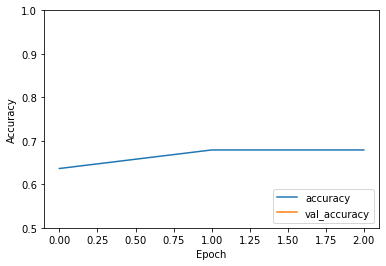

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [13]:
history.history

{'loss': [0.8959041237831116, 0.8724673986434937, 0.8724673986434937],
 'accuracy': [0.6363636255264282, 0.6789772510528564, 0.6789772510528564],
 'val_loss': [1.1486669778823853, 1.1486669778823853, 1.1486669778823853],
 'val_accuracy': [0.4027777910232544, 0.4027777910232544, 0.4027777910232544]}